In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
from sklearn import datasets

In [13]:
bh=datasets.load_boston()

In [14]:
bh.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [15]:
print(bh['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [16]:
bh.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [17]:
df=pd.DataFrame(data=bh.data,columns=bh.feature_names)

In [18]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [20]:
df['price']=bh.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
price      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [22]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0, 0.5, 'count')

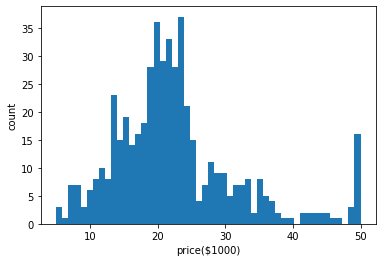

In [24]:
plt.hist(df['price'],bins=50)
plt.xlabel('price($1000)')
plt.ylabel('count')

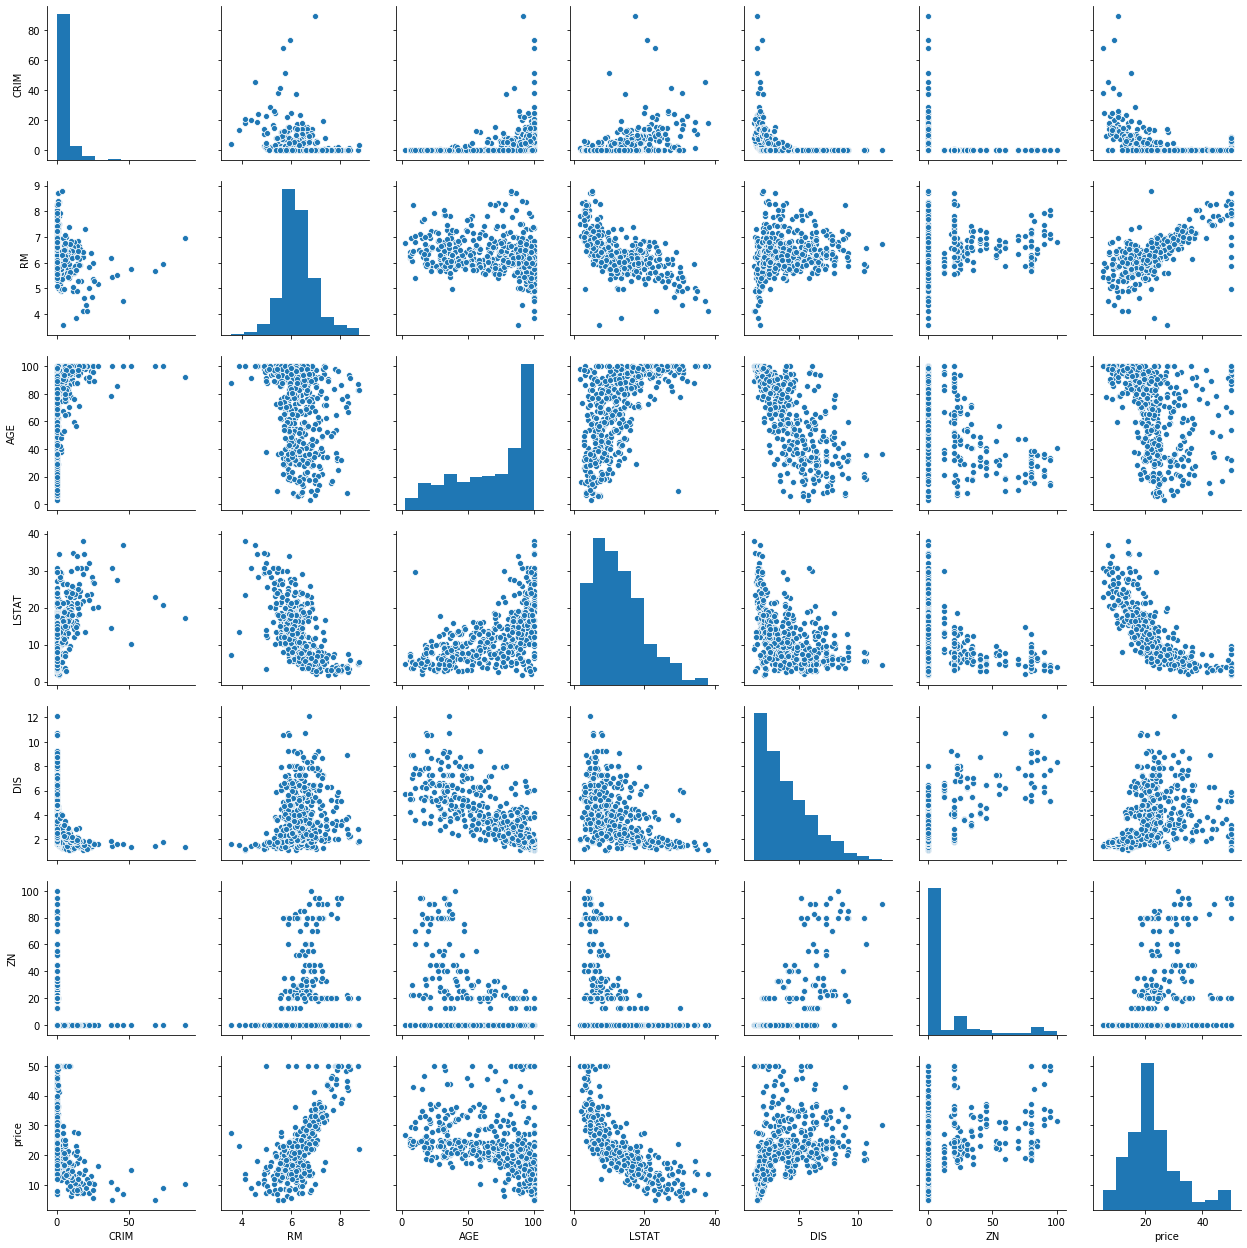

In [25]:
sns.pairplot(df[['CRIM','RM','AGE','LSTAT','DIS','ZN','price']])

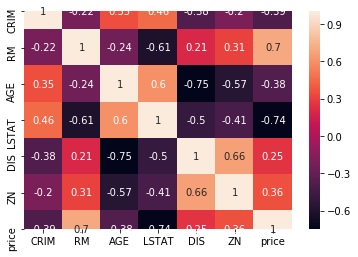

In [26]:
sns.heatmap(df[['CRIM','RM','AGE','LSTAT','DIS','ZN','price']].corr(),annot=True)

In [31]:
x=df[['ZN','CRIM','RM','AGE','LSTAT','DIS']]
y=df['price']
x.head()

,ZN,CRIM,RM,AGE,LSTAT,DIS
0,18.0,0.00632,6.575,65.2,4.98,4.0900
1,0.0,0.02731,6.421,78.9,9.14,4.9671
2,0.0,0.02729,7.185,61.1,4.03,4.9671
3,0.0,0.03237,6.998,45.8,2.94,6.0622
4,0.0,0.06905,7.147,54.2,5.33,6.0622


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [34]:
X_train.head(2)

,ZN,CRIM,RM,AGE,LSTAT,DIS
478,0.0,10.23300,6.185,96.7,18.03,2.1705
26,0.0,0.67191,5.813,90.3,14.81,4.6820


In [36]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 173 to 262
Data columns (total 6 columns):
ZN       167 non-null float64
CRIM     167 non-null float64
RM       167 non-null float64
AGE      167 non-null float64
LSTAT    167 non-null float64
DIS      167 non-null float64
dtypes: float64(6)
memory usage: 9.1 KB


In [37]:
from sklearn import linear_model

In [39]:
lm=linear_model.LinearRegression()

In [41]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
lm.intercept_

8.90528697198801

In [43]:
lm.coef_

array([ 0.05834141, -0.17564927,  4.53727272, -0.02529785, -0.66556685,
       -1.24284723])

In [44]:
x.columns

Index(['ZN', 'CRIM', 'RM', 'AGE', 'LSTAT', 'DIS'], dtype='object')

In [46]:
coef=pd.DataFrame(data=lm.coef_,index=x.columns,columns=['Coefficiens'])

In [47]:
coef

,Coefficiens
ZN,0.058341
CRIM,-0.175649
RM,4.537273
AGE,-0.025298
LSTAT,-0.665567
DIS,-1.242847


In [49]:
pred=lm.predict(X_test)

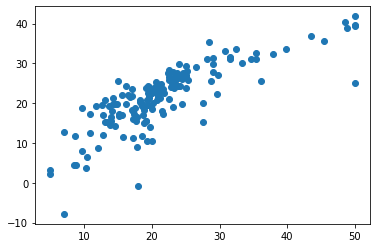

In [50]:
plt.scatter(y_test,pred)

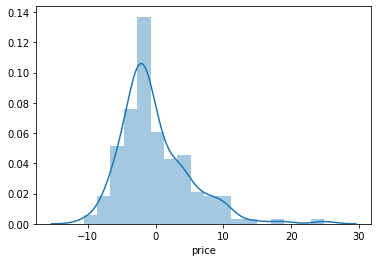

In [51]:

sns.distplot(y_test-pred)

In [54]:
from sklearn import metrics

In [56]:
print('MAE:',metrics.mean_squared_error(y_test,pred))
print('MSE:',metrics.mean_absolute_error(y_test,pred))

MAE: 26.598371716003292
MSE: 3.872312558751269
